In [ ]:
#filtering the warnings 
import warnings 
warnings.filterwarnings('ignore')

#importing the required files
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [ ]:
#loading the dataframe of predictions
df = pd.read_csv('/content/final_prediction_data.csv')

In [ ]:
#loading the dataframe used for training 
df2 = pd.read_csv('/content/drive/MyDrive/final_df.csv')

images                                         impression
0    CXR58_IM-2177-2001.png,CXR58_IM-2177-1001.png                                  No acute disease 
1  CXR575_IM-2173-2001.png,CXR575_IM-2173-1001.png            No acute cardiopulmonary abnormalities 
2  CXR600_IM-2192-2001.png,CXR600_IM-2192-1001.png                    Negative for acute abnormality 
3  CXR587_IM-2182-1001.png,CXR587_IM-2182-2001.png   No interval change in the appearance of the o...
4  CXR587_IM-2182-3001.png,CXR587_IM-2182-2001.png   No interval change in the appearance of the o...

## Analysing the predicted sentences


In [ ]:
df['BLEU Score'].describe()

count    4065.000000
mean        0.164666
std         0.224372
min         0.000000
25%         0.000000
50%         0.064648
75%         0.238844
max         1.000000
Name: BLEU Score, dtype: float64

#### Observations : 

From the above analysis of the dataframe we can conculde that there are few sentence which are exactly predicted as that of actual sentence (i.e., max BLUE Score is 1).

There are few points for which the BLEU score is 0 which indicates that predictions did not match. 

In [ ]:
print("No. of unique Predicted impression Report in the Dataset : {}".format(len(df['Predictions'].unique())))
print("No. of Predicted impression report repeated more than one times : {}".format(np.sum(df['Predictions'].value_counts()>1)))

No. of unique Predicted impression Report in the Dataset : 3217
No. of Predicted impression report repeated more than one times : 85


#### Observations:

Here we can observe that number of unique predicted impressions are 3217 and the number of times a predicted impression report occured is 86.

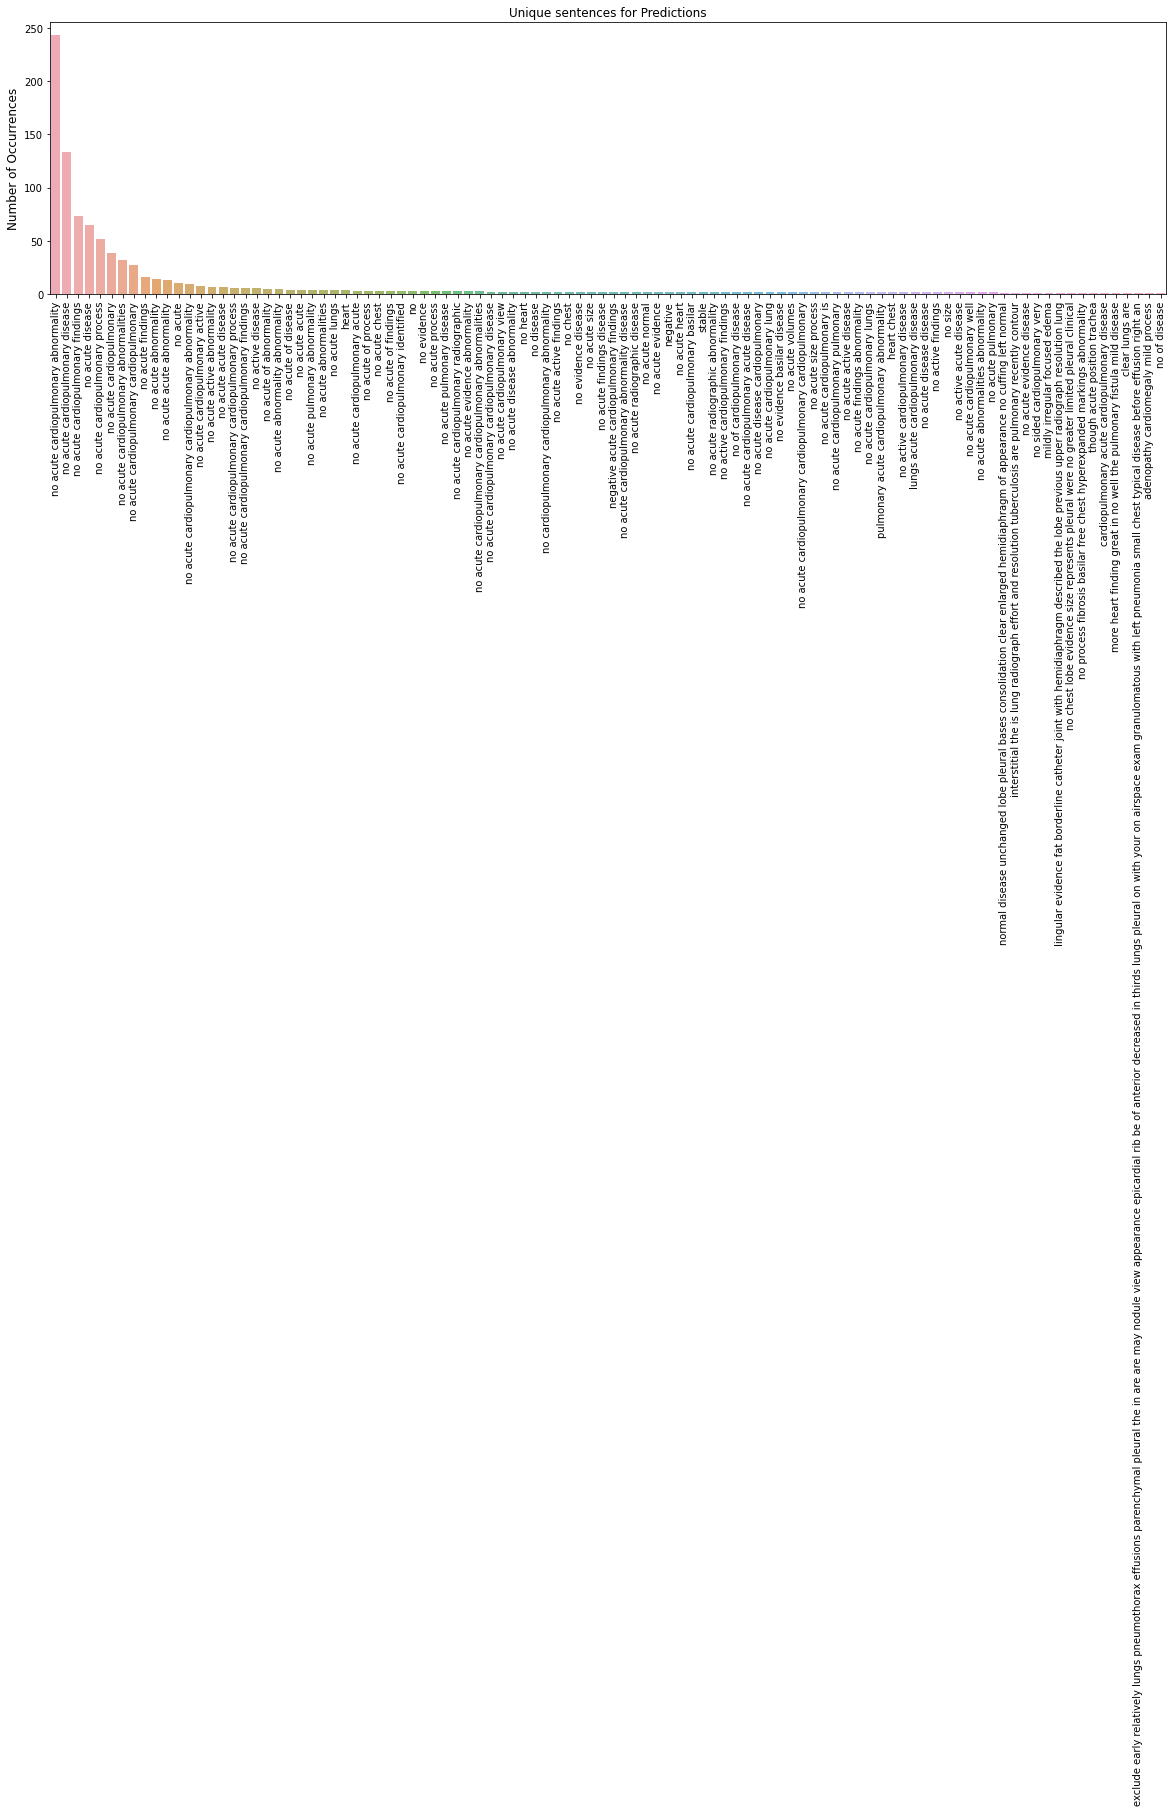

In [ ]:
impression = df.Predictions.value_counts()[:100]
plt.figure(figsize=(20,5))
sns.barplot(impression.index, impression.values, alpha=0.8)
plt.title("Unique sentences for Predictions")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### Observations :

This plot is somewhat similiar to Unique sentences for impression which indicates that the predictions are some what similiar to actual impressions.

In [ ]:
df['prediction_len'] = df['Predictions'].map(str).apply(lambda x:len(x.split()))

In [ ]:
df['prediction_len'].describe()

count    4065.000000
mean       10.469373
std        12.024667
min         1.000000
25%         4.000000
50%         5.000000
75%        12.000000
max       122.000000
Name: prediction_len, dtype: float64

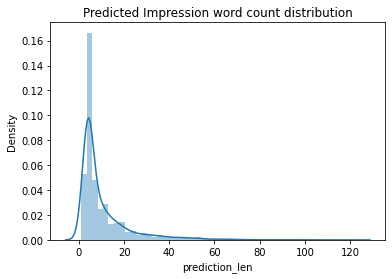

In [ ]:
sns.distplot(df['prediction_len'])
plt.title("Predicted Impression word count distribution")
plt.show()

In [ ]:
df = df.drop('prediction_len',axis=1)

#### Observation:
Here we can observe that the max length in predicted impressions is 122 which is almost same as max length in actual impressions which is 123. 

Above plot also indicates that its similarity with word count in actual impression . 


# Best Predictions

In [ ]:
best_df = df[df['BLEU Score']==1]
best_df.head()

Actual  ... BLEU Score
177     no acute cardiopulmonary findings  ...        1.0
385  no acute cardiopulmonary abnormality  ...        1.0
629  no acute cardiopulmonary abnormality  ...        1.0
710     no acute cardiopulmonary findings  ...        1.0
890  no acute cardiopulmonary abnormality  ...        1.0

[5 rows x 3 columns]

In [ ]:
#fetching the indices to get the corresponding images 
best_df.index

Int64Index([ 177,  385,  629,  710,  890, 1270, 1291, 1303, 1369, 1509, 1559,
            1635, 1645, 1961, 1970, 2186, 2288, 2384, 2485, 2502, 2614, 2615,
            2686, 2948, 2967, 3074, 3125, 3284, 3617, 3794, 3847, 4062],
           dtype='int64')

In [ ]:
# fetching the images corresponding to best results 
files = df2.iloc[best_df.index]['images'].apply(lambda x:x.split(','))
best_images=set()
for file in files:
    best_images.add(file[0])
    best_images.add(file[1])

In [150]:
sizebytes=[]
fnames=[]

for file in best_images:
    statinfo=os.stat('/content/drive/MyDrive/NLMCXR_png/'+file)
    file=file.split('.')[0]
    sizebytes.append(statinfo.st_size/(1024.0))
    fnames.append(file)

image_size_df=pd.DataFrame({'Image':fnames,'size':sizebytes})
print(image_size_df.head())

                  Image        size
0  CXR1547_IM-0357-1001  185.515625
1  CXR2102_IM-0733-2001  176.397461
2    CXR54_IM-2145-1001  158.793945
3  CXR1267_IM-0179-1002  228.198242
4  CXR2569_IM-1071-3001  219.870117


In [153]:
img_names_size_lt_100KB = image_size_df['Image'].values
img_names_size_lt_100KB=list(img_names_size_lt_100KB)

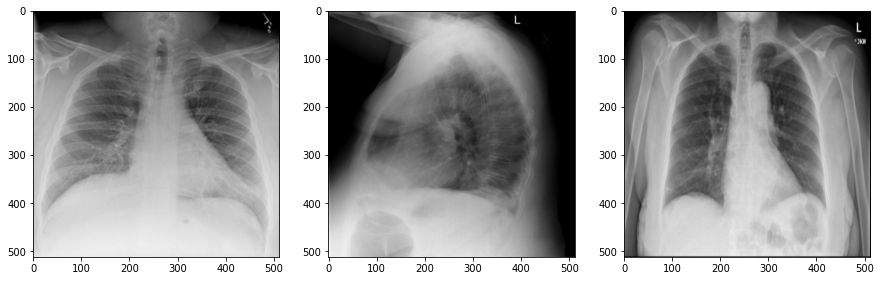

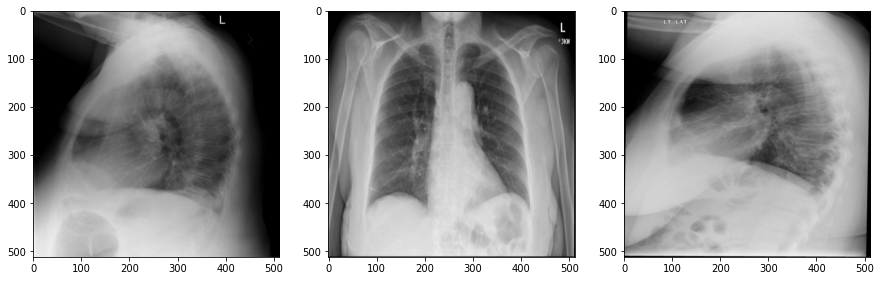

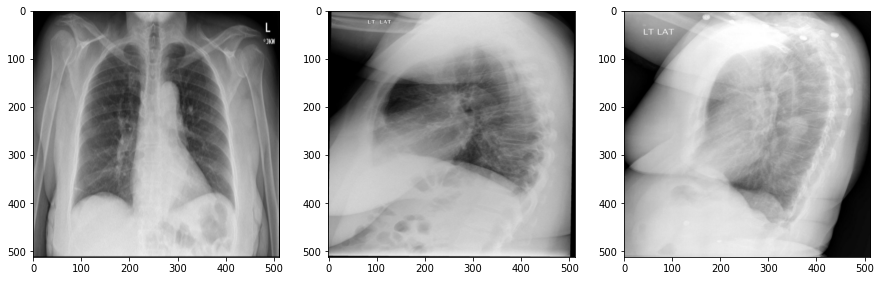

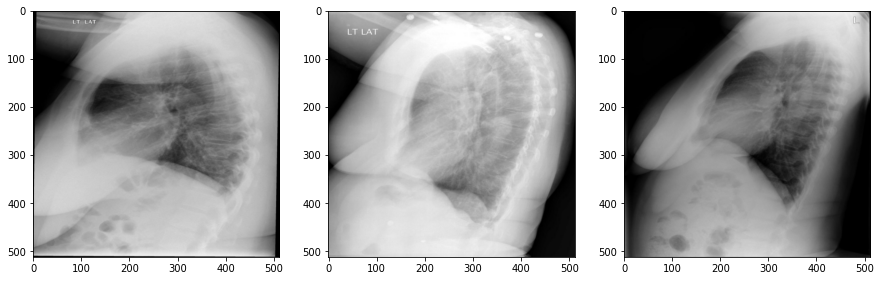

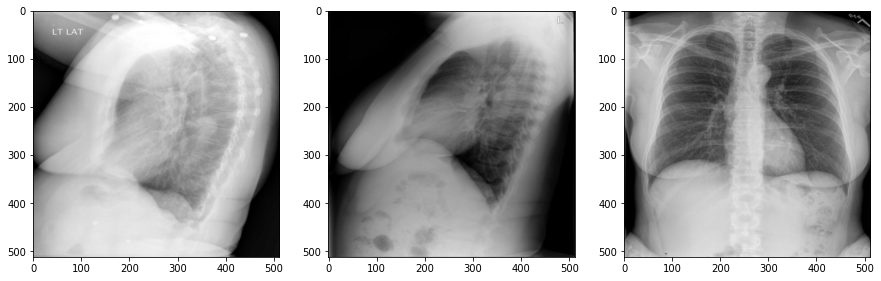

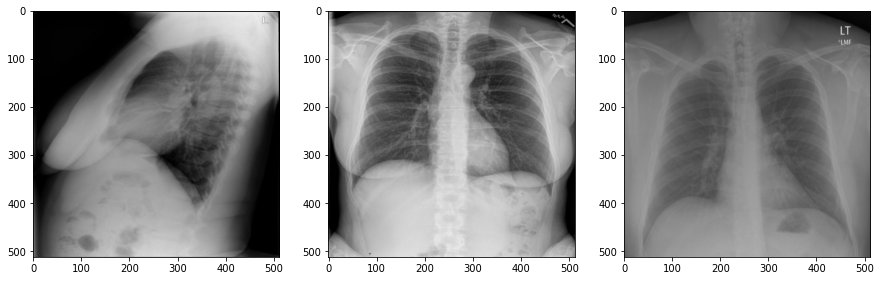

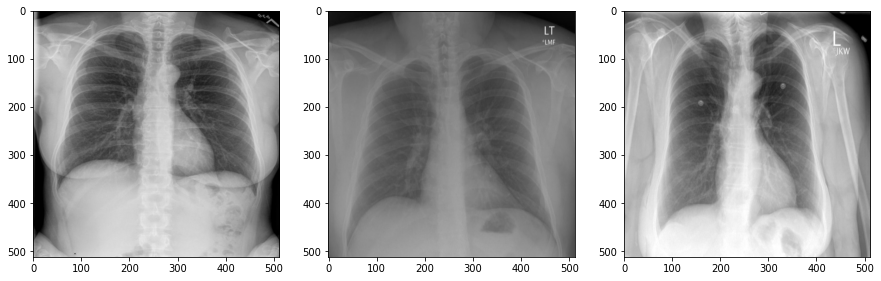

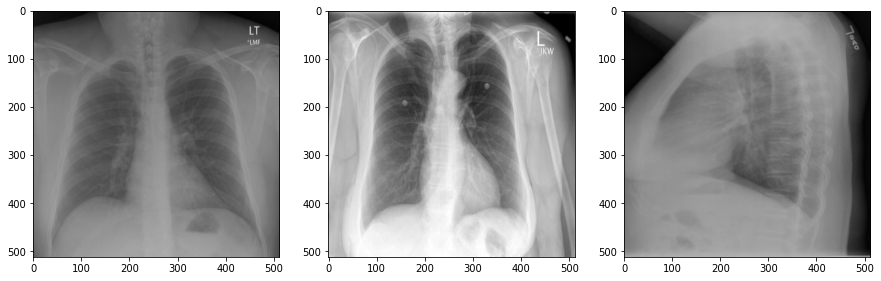

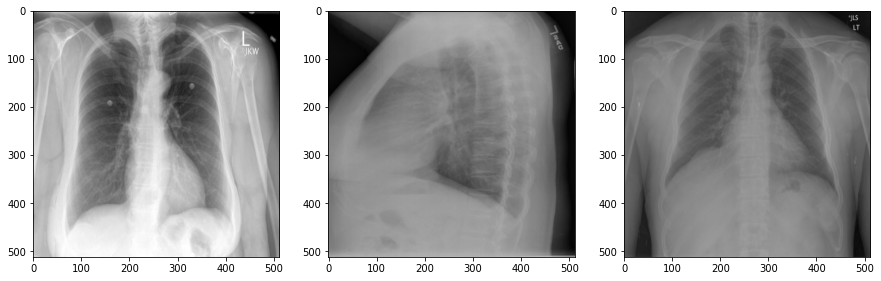

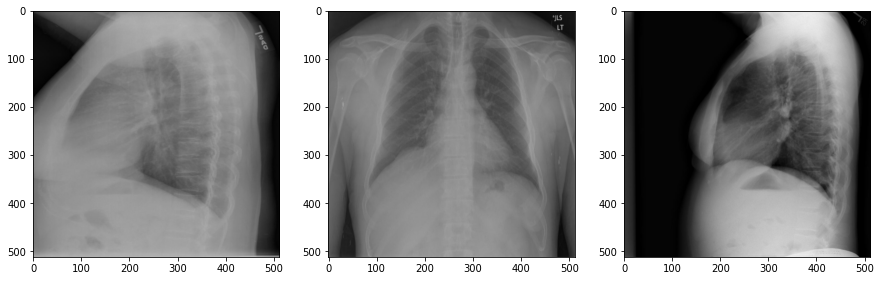

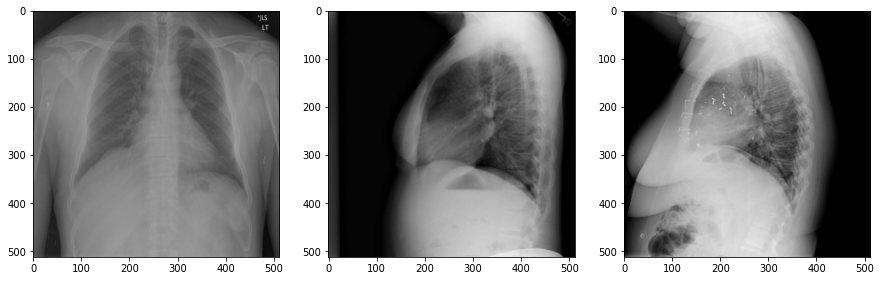

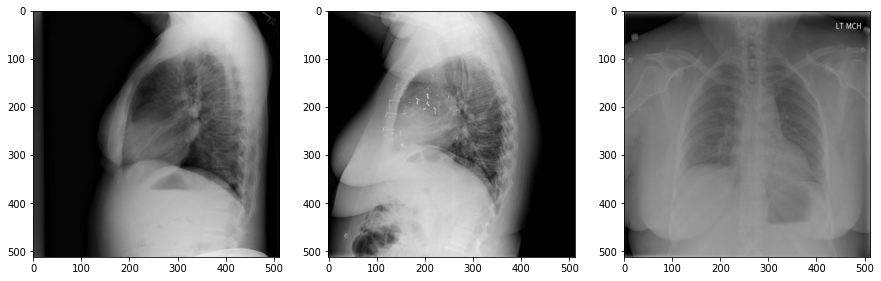

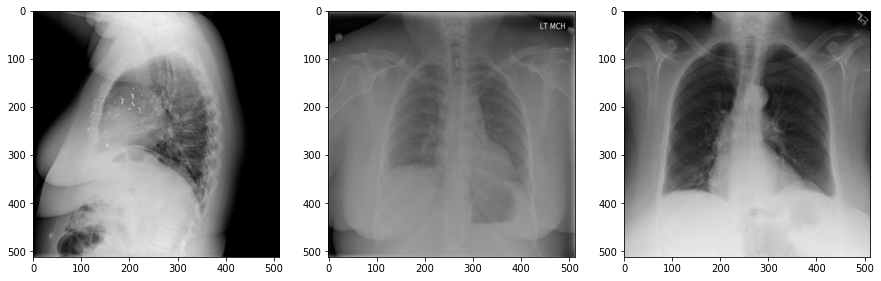

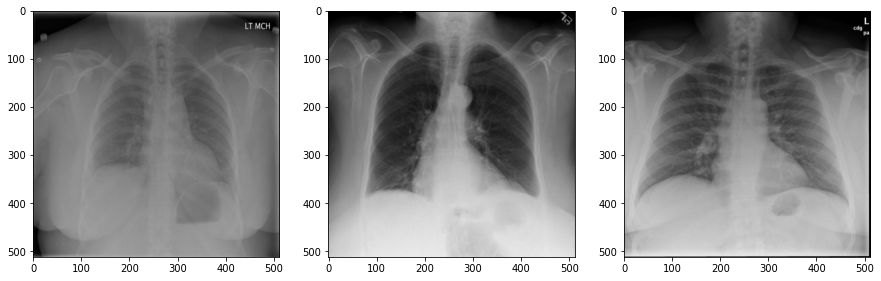

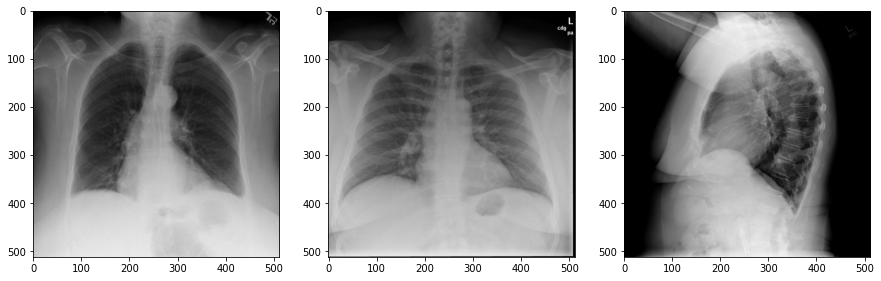

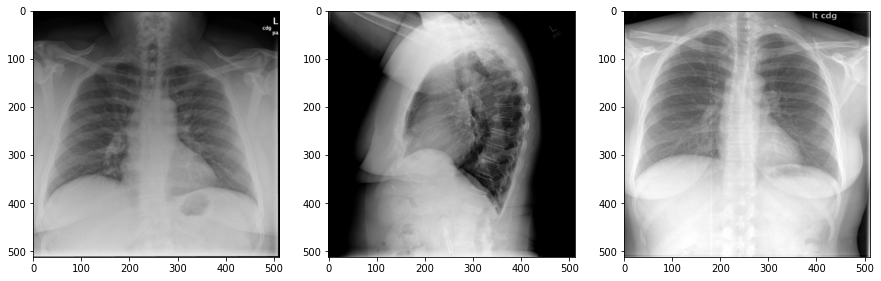

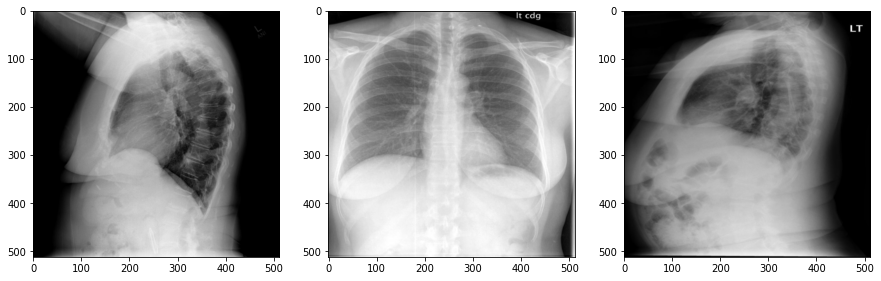

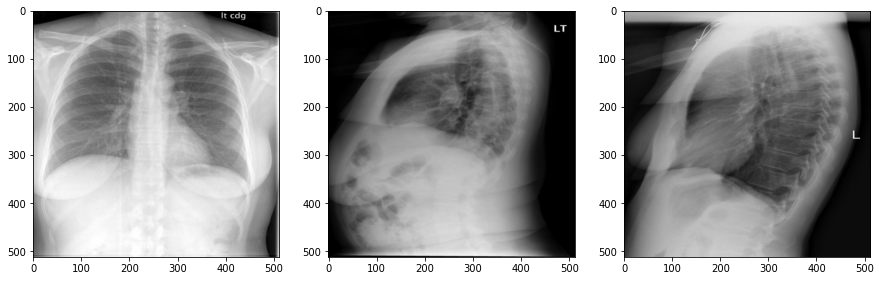

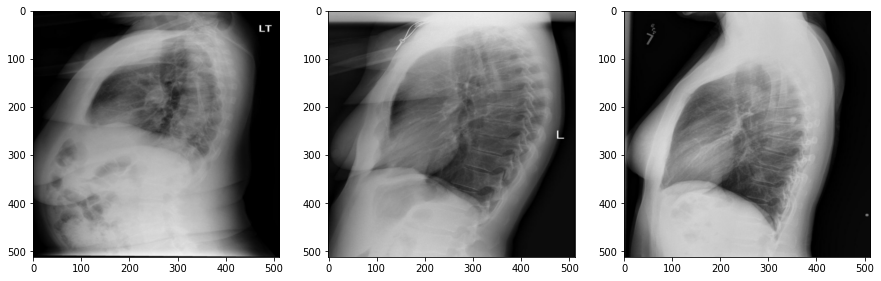

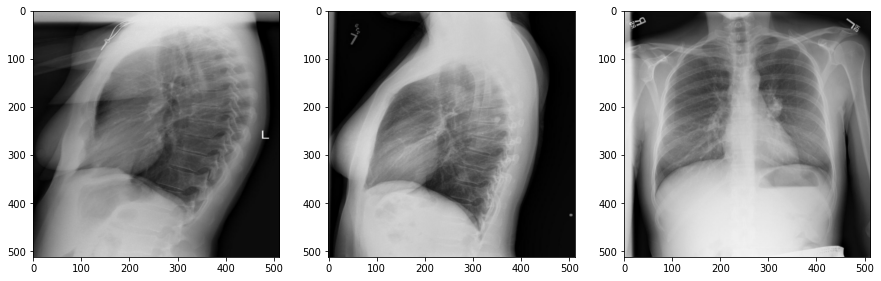

In [155]:
k=len(list(img_names_size_lt_100KB))
for i in range(len(list(img_names_size_lt_100KB))):
    fr_view = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i]+'.png'),cv2.IMREAD_UNCHANGED)
    fr_view = cv2.resize(fr_view,(512,512))

    la_view = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i+1]+'.png'),cv2.IMREAD_UNCHANGED)
    la_view = cv2.resize(la_view,(512,512))

    la_view_2 = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i+2]+'.png'),cv2.IMREAD_UNCHANGED)
    la_view_2 = cv2.resize(la_view_2,(512,512))    
    
    k=k-3
    plt.figure(figsize=(15,6))  
    plt.subplot(131)
    plt.imshow(fr_view)
    plt.subplot(132)
    plt.imshow(la_view)
    plt.subplot(133)
    plt.imshow(la_view_2)
    plt.show()
    if(k<3):
        break

#### Observations:

We can observe that the best predictions corresponds to a high resolution images which are clearly visible and the bones are some what dark compared to the background. 

As a result we can conculde that the images of high resolution helps in predicting the impression more accurate. 

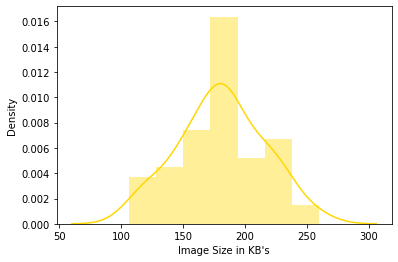

In [ ]:
sns.distplot(image_size_df['size'].values , color="gold")
plt.xlabel('Image Size in KB\'s')
plt.show()head()

#### Observations :

From the above plot we can observe that best predictions are having a images of good resolution. No image size in best predictions have less than 100KB.

In [ ]:
best_df.shape

(32, 3)

In [ ]:
# getting acutal length of the impression
best_df['actual_len']= best_df['Actual'].apply(lambda x : len(x.split()))
# getting length of predicted impression
best_df['pred_len']=best_df['Predictions'].apply(lambda x:len(x.split()))

In [ ]:
# finding difference between the words count of acutal impression and predicted impression for each record
best_values = best_df['actual_len'].values-best_df['pred_len'].values

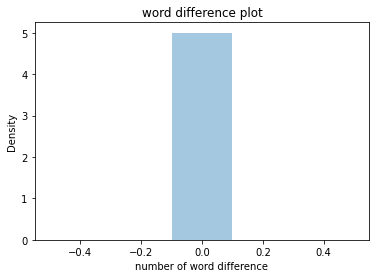

In [ ]:
sns.distplot(best_values)
plt.xlabel('number of word difference')
plt.title('word difference plot')
plt.show()

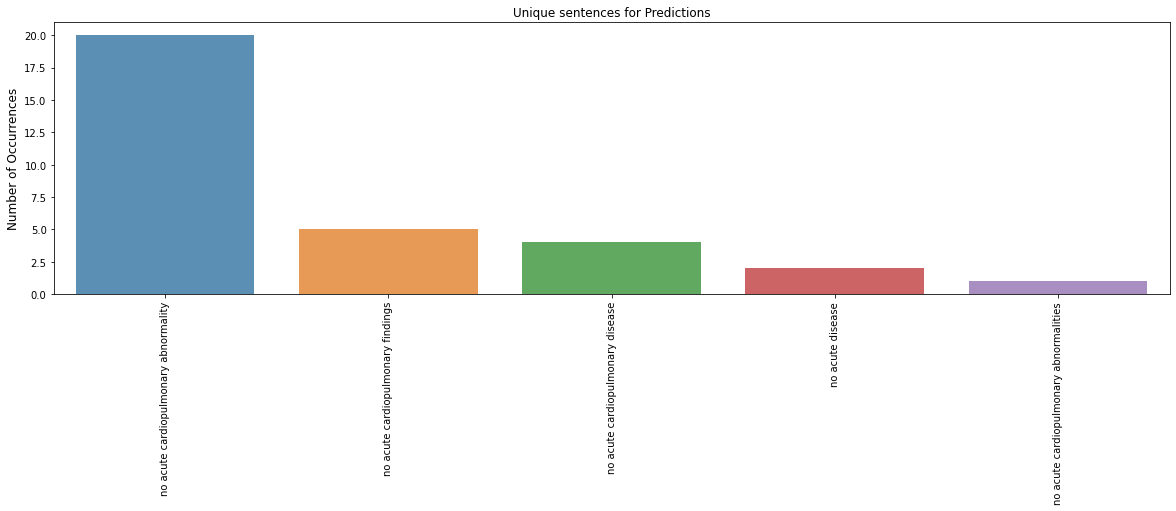

In [ ]:
impression = best_df.Predictions.value_counts()[:100]
plt.figure(figsize=(20,5))
sns.barplot(impression.index, impression.values, alpha=0.8)
plt.title("Unique sentences for Best Predictions")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### Observation : 

We can observe from the above results that the predictions are accurate to the actual impression and its similar to actual impression. 

# Good Predictions

In [ ]:
good_df = df[(df['BLEU Score']!=1)&(df['BLEU Score']!=0)]
good_df.head()

Actual  ... BLEU Score
0                                   no acute disease  ...   0.477688
1             no acute cardiopulmonary abnormalities  ...   0.750000
3  no interval change in the appearance of the op...  ...   0.071429
4  no interval change in the appearance of the op...  ...   0.093063
7                  no acute cardiopulmonary findings  ...   0.194700

[5 rows x 3 columns]

In [ ]:
good_df['BLEU Score'].describe()

count    2.895000e+03
mean     2.201611e-01
std      2.218944e-01
min      7.714056e-14
25%      4.794590e-02
50%      1.428571e-01
75%      3.333333e-01
max      8.000000e-01
Name: BLEU Score, dtype: float64

In [ ]:
# getting acutal length of the impression
good_df['actual_len']= good_df['Actual'].apply(lambda x : len(x.split()))
# getting length of predicted impression
good_df['pred_len']=good_df['Predictions'].apply(lambda x:len(x.split()))

In [ ]:
# finding difference between the words count of acutal impression and predicted impression for each record
good_values = good_df['actual_len'].values-good_df['pred_len'].values

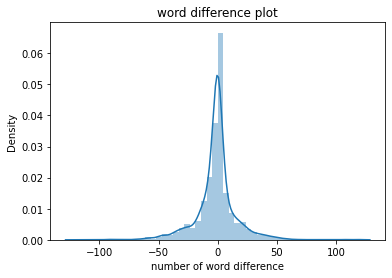

In [ ]:
sns.distplot(good_values)
plt.title('word difference plot')
plt.xlabel('number of word difference')
plt.show()

In [ ]:
#fetching the indices to get the corresponding images 
good_df.index

Int64Index([   0,    1,    3,    4,    7,    8,   11,   12,   13,   14,
            ...
            4050, 4052, 4053, 4056, 4057, 4058, 4059, 4061, 4063, 4064],
           dtype='int64', length=2895)

In [ ]:
# fetching the images corresponding to good results 
files = df2.iloc[good_df.index]['images'].apply(lambda x:x.split(','))
good_images=set()
for file in files:
    good_images.add(file[0])
    good_images.add(file[1])

In [ ]:
#https://www.geeksforgeeks.org/python-os-stat-method/

sizebytes=[]
fnames=[]

for file in good_images:
    statinfo=os.stat('/content/drive/MyDrive/NLMCXR_png/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    # converting into KB's
    sizebytes.append(statinfo.st_size/(1024.0))
    fnames.append(file)

image_size_df=pd.DataFrame({'Image':fnames,'size':sizebytes})
print(image_size_df.head())

                  Image        size
0   CXR345_IM-1672-2001  201.602539
1  CXR1442_IM-0286-1001  192.638672
2  CXR3827_IM-1932-1001  173.744141
3   CXR343_IM-1658-1001  212.072266
4  CXR1049_IM-0036-3001  206.741211


In [ ]:
image_size_df['size'].describe()

count    5365.000000
mean      179.641513
std        32.939158
min         3.128906
25%       156.639648
50%       180.244141
75%       203.115234
max       289.555664
Name: size, dtype: float64

In [ ]:
img_names_size_lt_100KB = image_size_df['Image'].iloc[image_size_df[image_size_df['size']<100].index]
img_names_size_lt_100KB=list(img_names_size_lt_100KB.values)

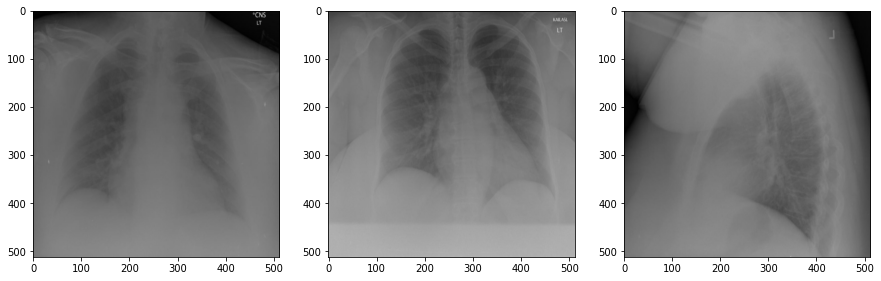

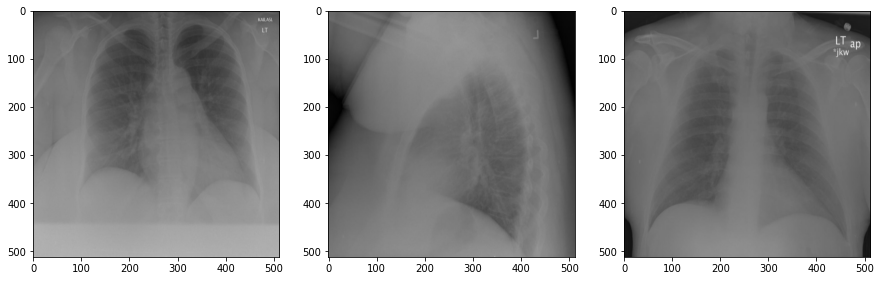

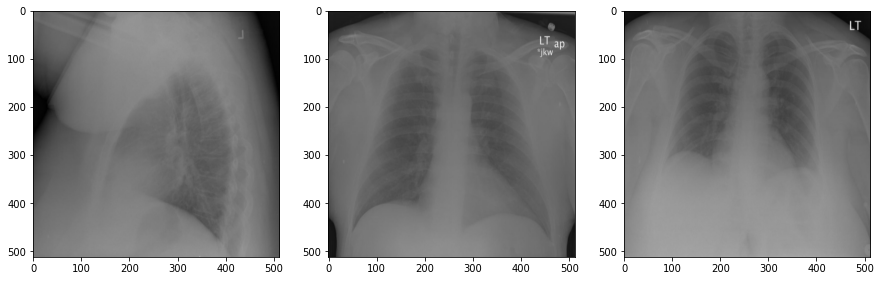

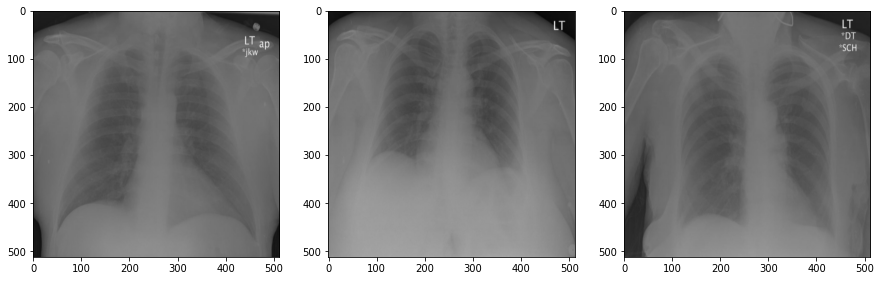

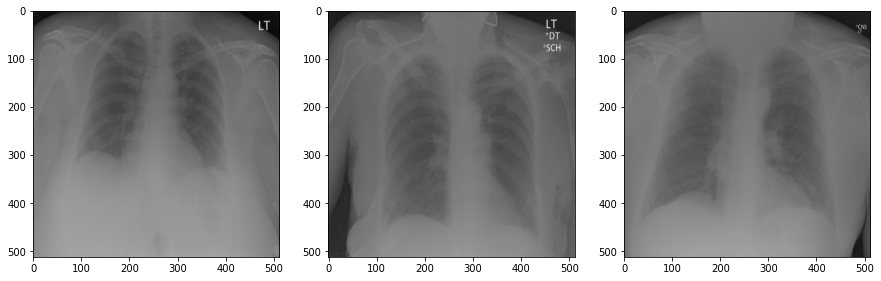

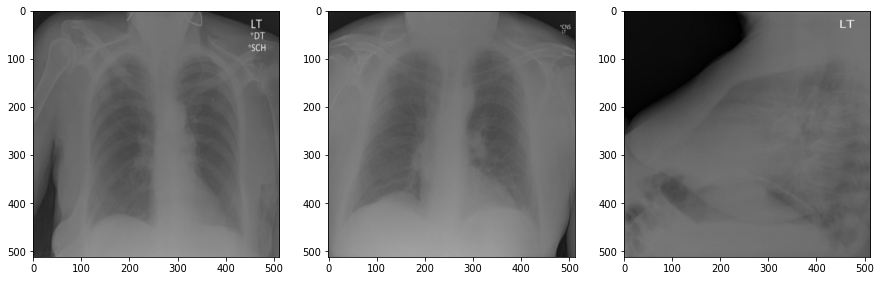

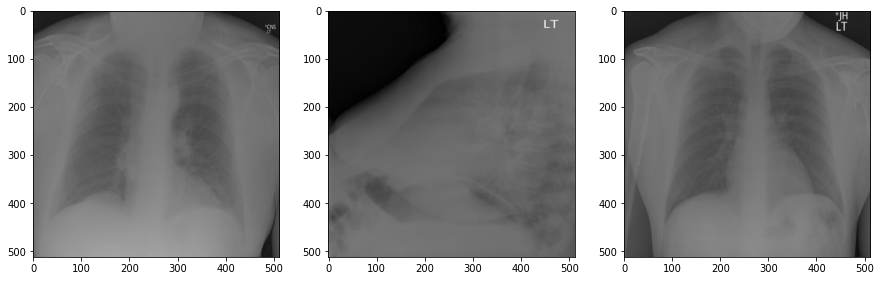

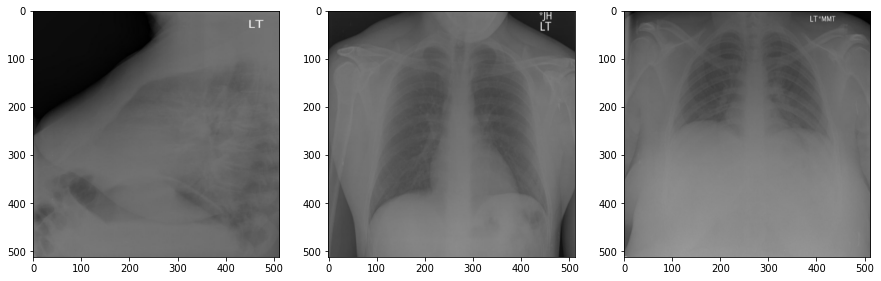

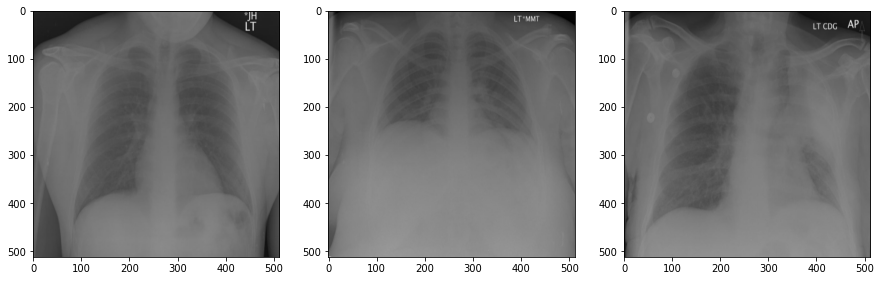

In [143]:
k=len(list(img_names_size_lt_100KB))
for i in range(len(list(img_names_size_lt_100KB))):
    #print(img_names_size_lt_100KB[i])
    fr_view = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i]+'.png'),cv2.IMREAD_UNCHANGED)
    #print('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i]))
    fr_view = cv2.resize(fr_view,(512,512))

    la_view = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i+1]+'.png'),cv2.IMREAD_UNCHANGED)
    la_view = cv2.resize(la_view,(512,512))

    la_view_2 = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i+2]+'.png'),cv2.IMREAD_UNCHANGED)
    la_view_2 = cv2.resize(la_view_2,(512,512))    
    k=k-3
    plt.figure(figsize=(15,6))  
    plt.subplot(131)
    plt.imshow(fr_view)
    plt.subplot(132)
    plt.imshow(la_view)
    plt.subplot(133)
    plt.imshow(la_view_2)
    plt.show()
    if(k<3):
        break

#### Observations:

We can observe that the good predictions corresponds to a low resolution images which are not clearly visible.

As a result we can conculde that the images of low resolution doesnot helps in predicting the impression. 

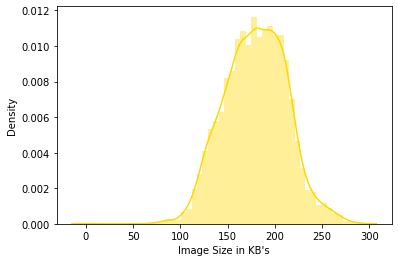

In [ ]:
sns.distplot(image_size_df['size'].values , color="gold")
plt.xlabel('Image Size in KB\'s')
plt.show()

#### Observation:

We observe the number of words difference distribution is somewhat looking like a gaussian distribtion and narrow when compared to worst predictions. 

Here we can observe that its peaked at zero  indicating that the number of words is same.

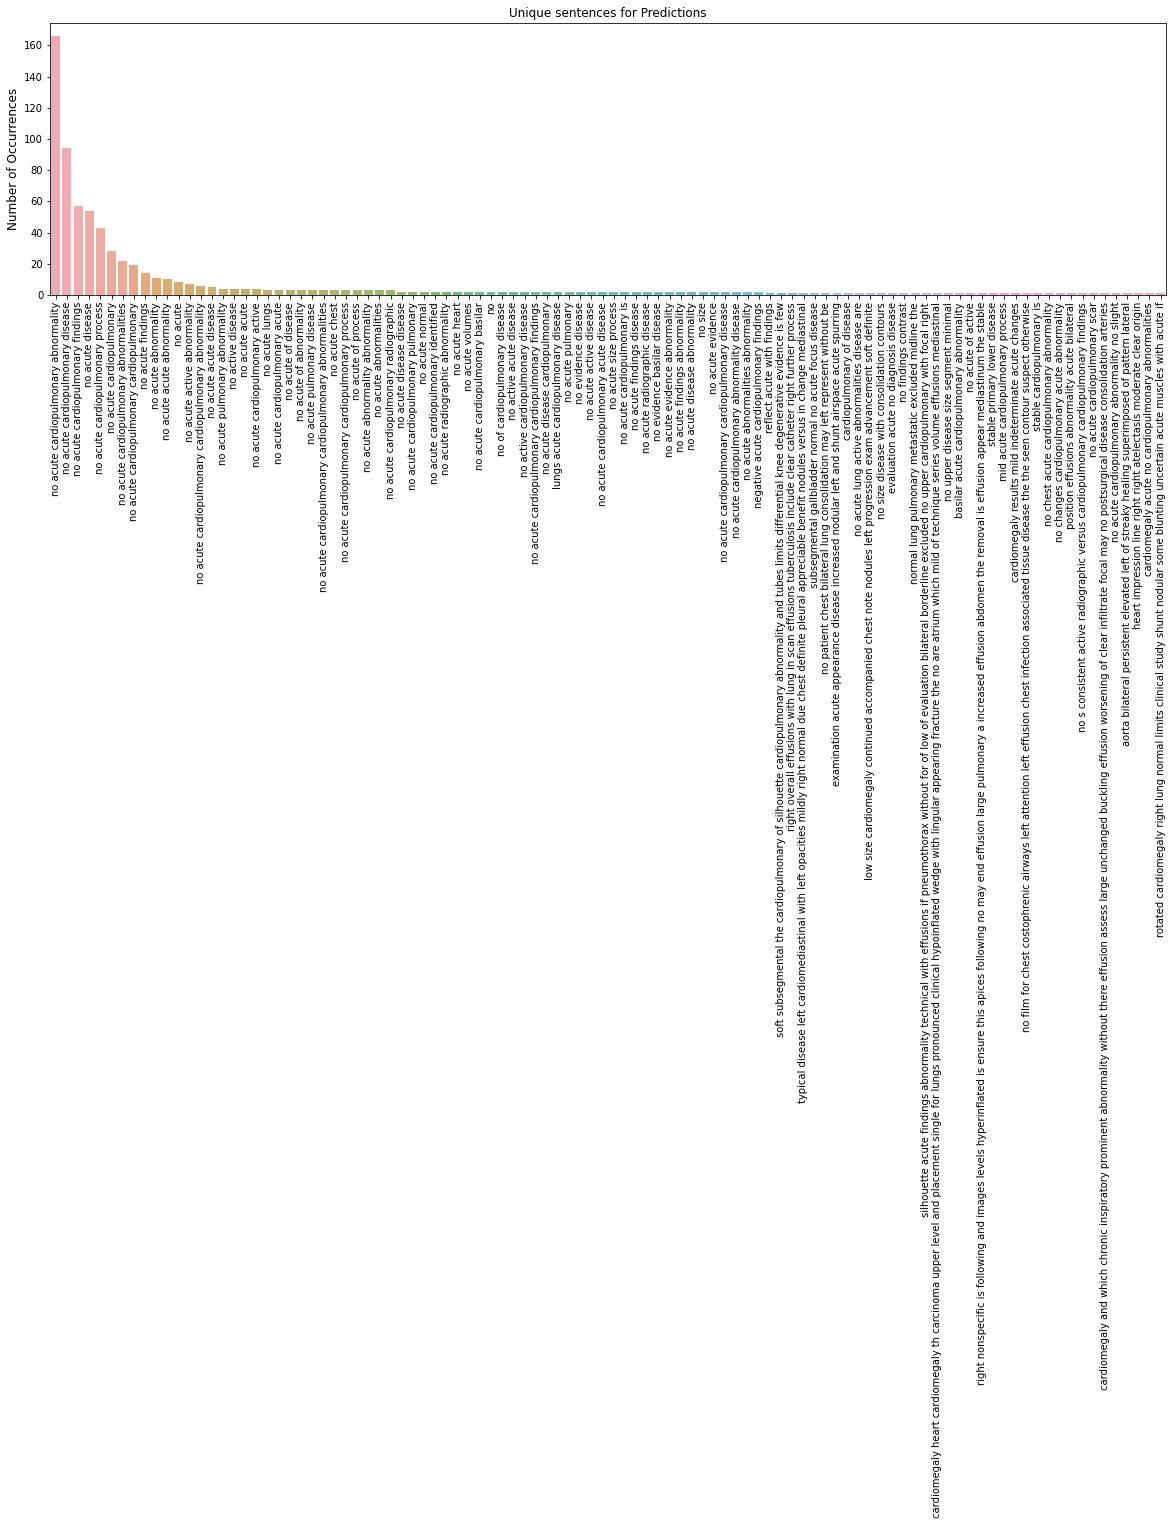

In [ ]:
impression = good_df.Predictions.value_counts()[:100]
plt.figure(figsize=(20,5))
sns.barplot(impression.index, impression.values, alpha=0.8)
plt.title("Unique sentences for good Predictions")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.show()

#### worst predictions

In [ ]:
wrst_df = df[df['BLEU Score']==0]
wrst_df.head()

Actual  ... BLEU Score
2                      negative for acute abnormality  ...        0.0
5                       no evidence of active disease  ...        0.0
6   right middle lobe airspace disease may reflect...  ...        0.0
9   borderline cardiomegaly age indeterminate chro...  ...        0.0
10               no acute cardiopulmonary abnormality  ...        0.0

[5 rows x 3 columns]

In [ ]:
wrst_df['Predictions']=wrst_df['Predictions'].fillna('no impression')

In [ ]:
# getting acutal length of the impression
wrst_df['actual_len']= wrst_df['Actual'].apply(lambda x : len(x.split()))
# getting length of predicted impression
wrst_df['pred_len']=wrst_df['Predictions'].apply(lambda x:len(x.split()))

In [ ]:
# finding difference between the words count of acutal impression and predicted impression for each record
wrst_values = wrst_df['actual_len'].values-wrst_df['pred_len'].values

In [ ]:
#fetching the indices to get the corresponding images 
wrst_df.index

Int64Index([   2,    5,    6,    9,   10,   17,   22,   24,   25,   30,
            ...
            4029, 4035, 4038, 4039, 4041, 4043, 4051, 4054, 4055, 4060],
           dtype='int64', length=1138)

In [162]:
# fetching the images corresponding to wrst results 
files = df2.iloc[wrst_df.index]['images'].apply(lambda x:x.split(','))
wrst_images=set()
for file in files:
    wrst_images.add(file[0])
    wrst_images.add(file[1])

In [163]:
#https://www.geeksforgeeks.org/python-os-stat-method/

sizebytes=[]
fnames=[]

for file in wrst_images:
    statinfo=os.stat('/content/drive/MyDrive/NLMCXR_png/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    # converting into KB's
    sizebytes.append(statinfo.st_size/(1024.0))
    fnames.append(file)

image_size_df=pd.DataFrame({'Image':fnames,'size':sizebytes})

                  Image        size
0  CXR3882_IM-1970-2001  126.816406
1  CXR2733_IM-1189-1001  116.109375
2   CXR405_IM-2053-2001  159.750977
3   CXR592_IM-2186-1001  171.541992
4  CXR3342_IM-1603-1001   83.471680


In [190]:
img_names_size_lt_100KB = image_size_df['Image'].iloc[image_size_df[image_size_df['size']<100].index]
img_names_size_lt_100KB=list(img_names_size_lt_100KB.values)

### Printing low quality images 

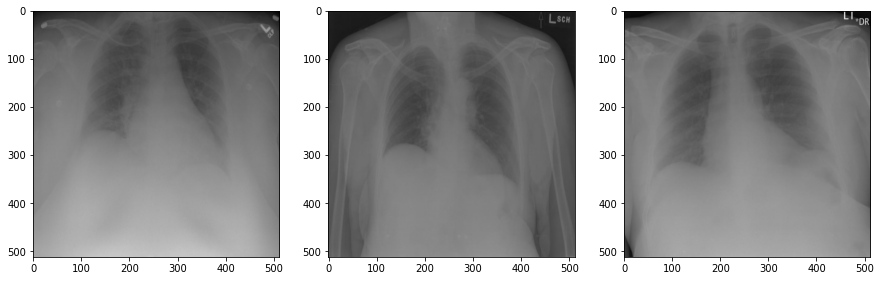

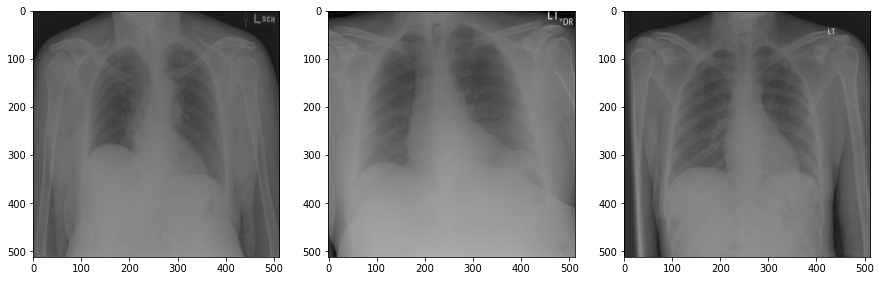

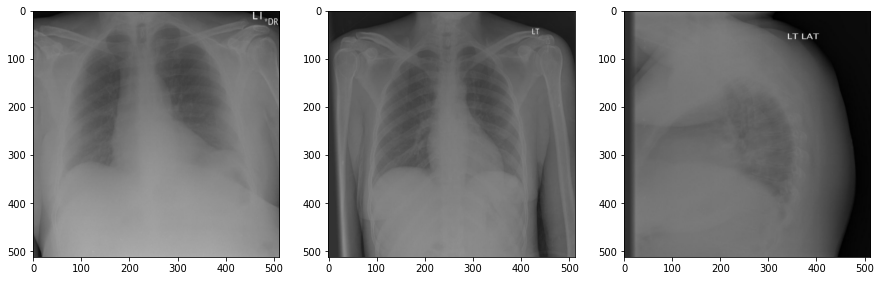

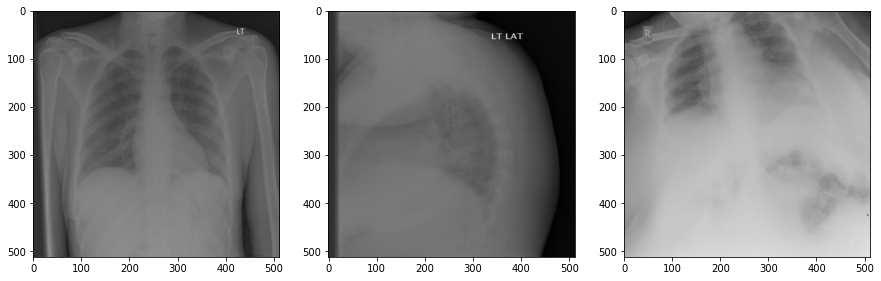

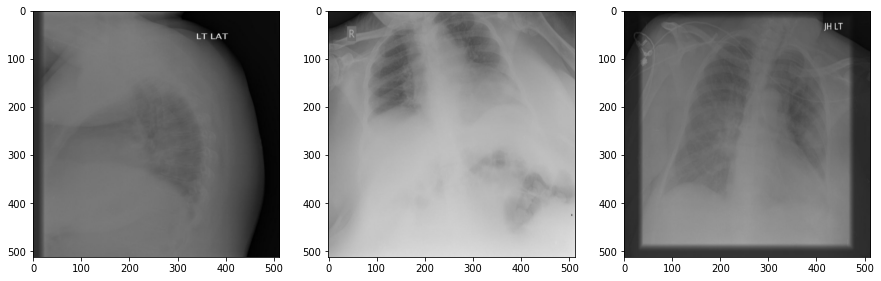

In [198]:
k=len(list(img_names_size_lt_100KB))
for i in range(len(list(img_names_size_lt_100KB))):
    #print(img_names_size_lt_100KB[i])
    fr_view = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i]+'.png'),cv2.IMREAD_UNCHANGED)
    #print('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i]))
    fr_view = cv2.resize(fr_view,(512,512))

    la_view = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i+1]+'.png'),cv2.IMREAD_UNCHANGED)
    la_view = cv2.resize(la_view,(512,512))

    la_view_2 = cv2.imread('/content/drive/MyDrive/NLMCXR_png/'+str(img_names_size_lt_100KB[i+2]+'.png'),cv2.IMREAD_UNCHANGED)
    la_view_2 = cv2.resize(la_view_2,(512,512))    
    k=k-3
    plt.figure(figsize=(15,6))  
    plt.subplot(131)
    plt.imshow(fr_view)
    plt.subplot(132)
    plt.imshow(la_view)
    plt.subplot(133)
    plt.imshow(la_view_2)
    plt.show()
    if(k<3):
        break

#### Observations:

We can observe that the bad predictions corresponds to a low resolution images which are not clearly visible.

As a result we can conculde that the images of low resolution doesnot helps in predicting the impression. 

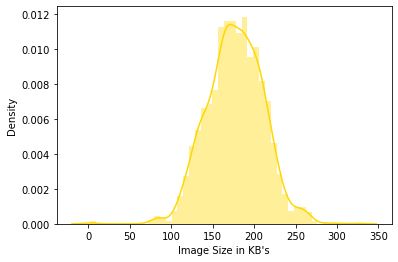

In [ ]:
sns.distplot(image_size_df['size'].values , color="gold")
plt.xlabel('Image Size in KB\'s')
plt.show()

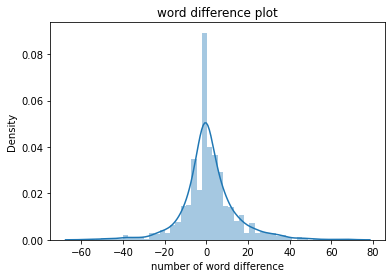

In [ ]:
sns.distplot(wrst_values)
plt.title('word difference plot')
plt.xlabel('number of word difference')
plt.show()

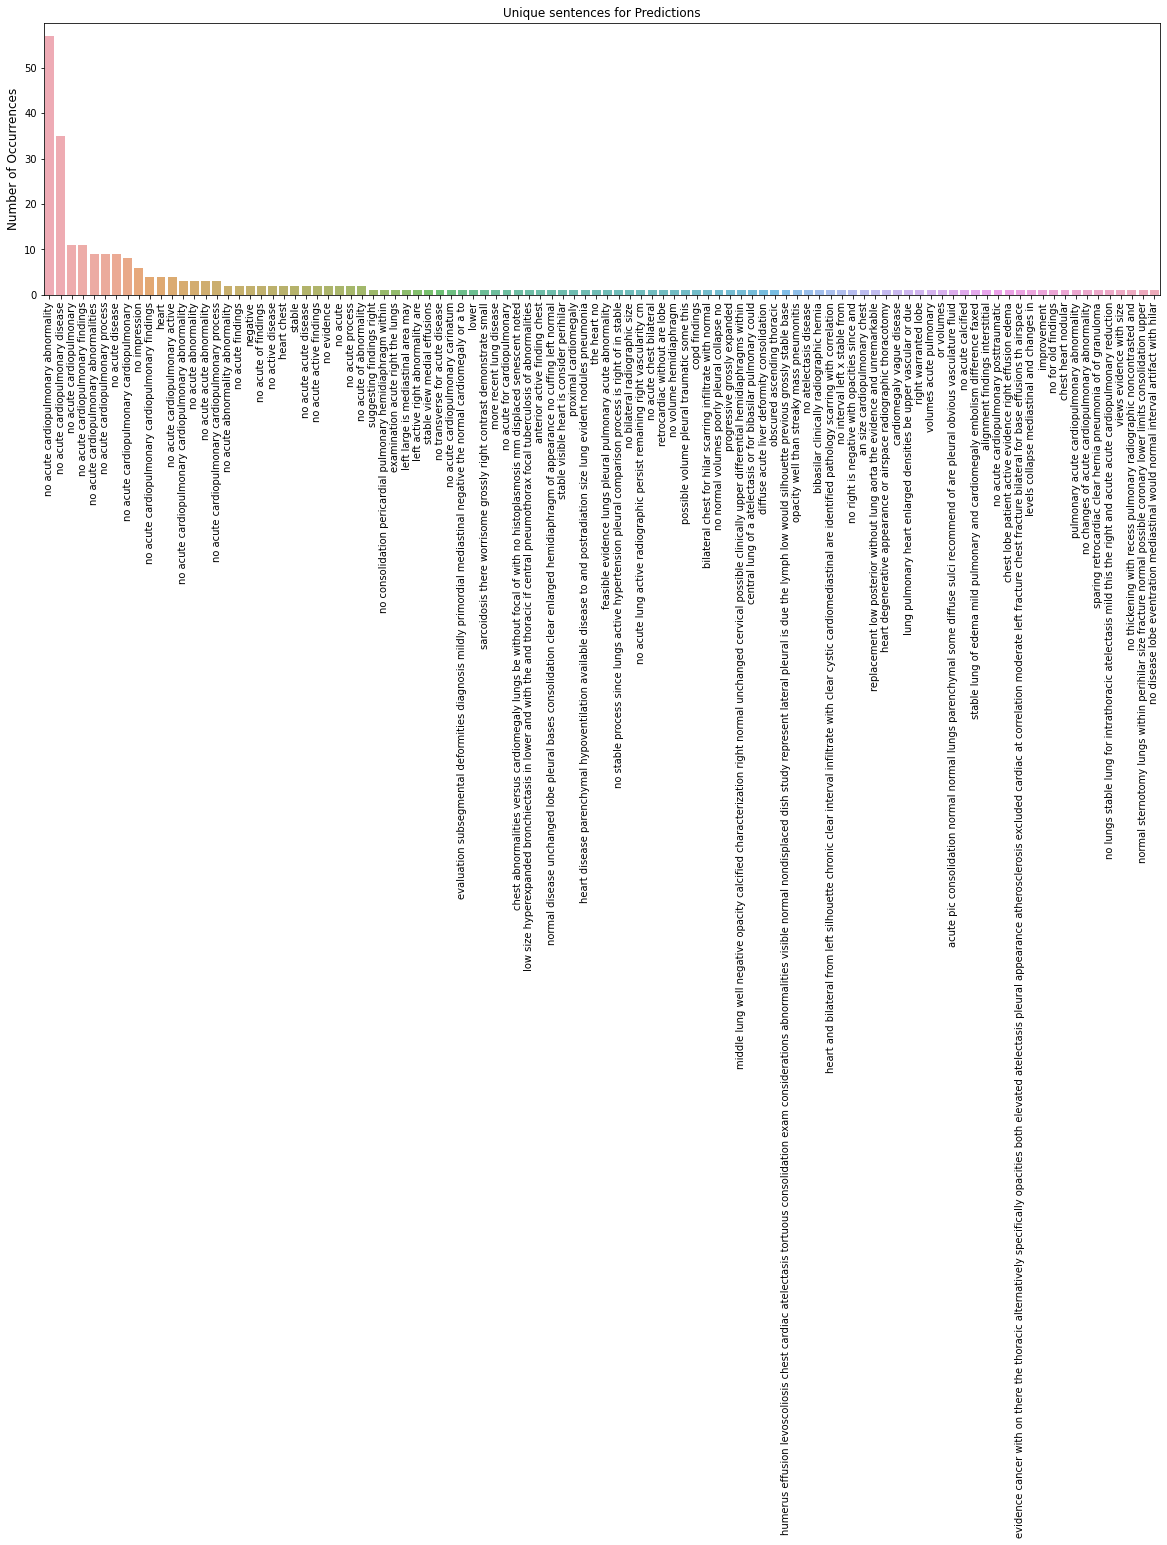

In [ ]:
impression = wrst_df.Predictions.value_counts()[:100]
plt.figure(figsize=(20,5))
sns.barplot(impression.index, impression.values, alpha=0.8)
plt.title("Unique sentences for worst Predictions")
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.show()

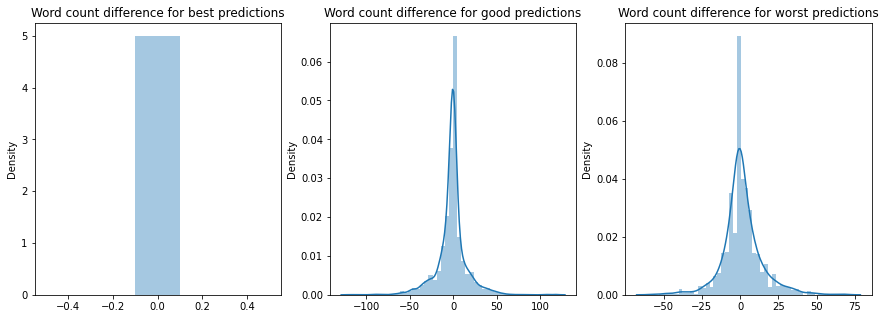

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.distplot(best_values,ax=axes[0])
axes[0].set(title='Word count difference for best predictions')
sns.distplot(good_values,ax=axes[1])
axes[1].set(title='Word count difference for good predictions')
sns.distplot(wrst_values,ax=axes[2])
axes[2].set(title='Word count difference for worst predictions')
plt.show()

#### Observation:

we can observe from the above plot that the count of word difference for each review from 3 categories . 

For the Best predicitions we could see that the number of words is exactly the same as actual impressions. 

While moving from good to worst the word count plot distribution spread is increasing. 


Quality of images is different for all the three categories . 

Best predictions -- contains high resolution images 

Good and Bad predictions --- contains low quality images. 